### Polynomial Features

Using sklearn we can get interaction terms for each variable along with a higher degree of the variable. For example, if we have two features A and B and use PolynomialFeatures, we will get back 1, A, B, A^2, B^2 AB.

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [23]:
df = pd.read_csv('../data/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


After doing polynomial features we should have (not gonna return the 1 since doing linear regression)
+ TV, Radio, Newspaper
+ TV^2, Radio^2, Newspaper^2
+ TV*Radio, TV*Newspaper, Newspaper*Radio


In [24]:
X = df.drop('sales', axis = 1)
y = df['sales']

In [25]:
# split data before polynomial features just to keep consistency for preprocessing best practices
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# polynomial fit transform training data
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train = poly.fit_transform(X_train)

In [26]:
# fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
X_train.shape

(160, 9)

In [28]:
# preprocess X_test since we now have 9 features
X_test = poly.transform(X_test)

In [29]:
# make predictions
pred = lr.predict(X_test)

The result is better than the multiple linear regression model with no polynomial features.

In [30]:
# rmse
rmse = root_mean_squared_error(y_test, pred)
rmse

0.6425809120553624

In [31]:
# make dataframe
features = poly.get_feature_names_out(input_features=X.columns)
coefs = lr.coef_

coef_df = pd.DataFrame([coefs], columns=features)

In [32]:
coef_df

,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2
0,0.053236,0.017098,0.010581,-0.000112,0.001111,-0.000074,0.000133,0.000125,0.000028


In [46]:

    
    
rmse_train = []
rmse_test = []

for i in range(1, 10):
    # Split the data into training and test sets within the loop
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create polynomial features for the training data
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    
    # Transform the test data using the same polynomial transformation
    X_test_poly = poly.transform(X_test)
    
    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Make predictions on the training data
    train_pred = model.predict(X_train_poly)
    
    # Calculate and store RMSE for the training data
    rmse_train.append(root_mean_squared_error(y_train, train_pred))
    
    # Make predictions on the test data
    test_pred = model.predict(X_test_poly)
    
    # Calculate and store RMSE for the test data
    rmse_test.append(root_mean_squared_error(y_test, test_pred))

    

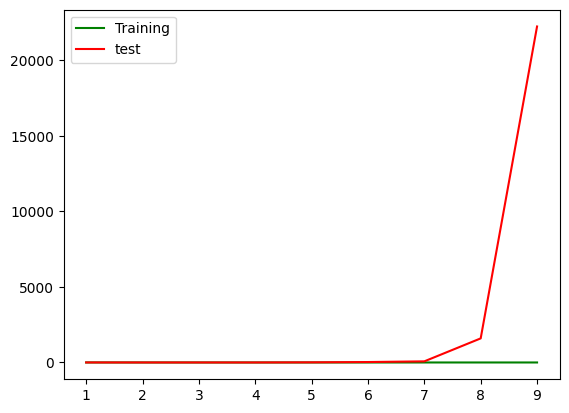

In [47]:
# plot results
import matplotlib.pyplot as plt
plt.plot(range(1, 10), rmse_train, color = 'green', label = 'Training')
plt.plot(range(1, 10), rmse_test, color = 'red', label = 'test')
plt.legend()


In [35]:
rmse_train

[0.6003304710491731,
 0.36841268311155373,
 0.2596440423563695,
 0.5537198259659625,
 0.8223978795201141,
 1.1256092840099399,
 1.5859398546416414,
 1.8566725123722652,
 2.3656347454262727]

In [36]:
rmse_test

[0.6425809120553624,
 0.786098672715059,
 29.08592900525888,
 2982.8143911853963,
 4991.313334469019,
 6457.534041300829,
 14934.480162824257,
 1923.4213897707602,
 3504.0164873797216]

In [42]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = (root_mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = (root_mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

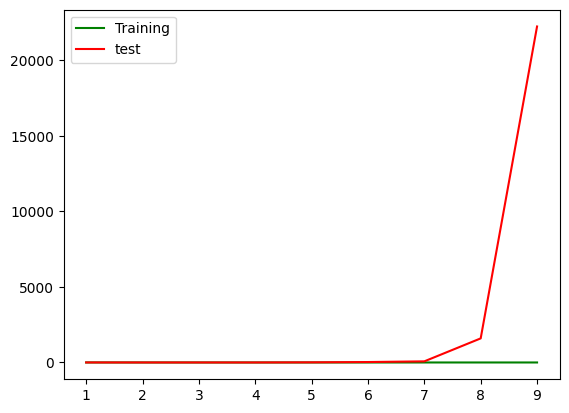

In [43]:
# plot results
import matplotlib.pyplot as plt
plt.plot(range(1, 10), train_rmse_errors, color = 'green', label = 'Training')
plt.plot(range(1, 10), test_rmse_errors, color = 'red', label = 'test')
plt.legend()
